#**IPL 2024 AUCTION DATA ANALYSIS**


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import locale
import plotly.express as px
import matplotlib.ticker as ticker  # Import ticker for formatting

##**Exploring the dataset**

In [23]:
df = pd.read_csv('IPL2024_Auction.csv')
# Display the first few rows of the DataFrame
df

,PLAYER,NATIONALITY,TYPE,TEAM,PRICE PAID
0,Daryl Mitchell,Overseas,All-Rounder,Chennai Super Kings,140000000
1,Sameer Rizvi,Indian,Batter,Chennai Super Kings,84000000
2,Shardul Thakur,Indian,All-Rounder,Chennai Super Kings,40000000
3,Mustafizur Rahman,Overseas,Bowler,Chennai Super Kings,20000000
4,Rachin Ravindra,Overseas,All-Rounder,Chennai Super Kings,18000000
...,...,...,...,...,...
67,Travis Head,Overseas,Batter,Sunrisers Hyderabad,68000000
68,Jaydev Unadkat,Indian,Bowler,Sunrisers Hyderabad,16000000
69,Wanindu Hasaranga,Overseas,All-Rounder,Sunrisers Hyderabad,15000000
70,Jhathavedh Subramanyan,Indian,Bowler,Sunrisers Hyderabad,2000000


##**Display Column Names**

In [4]:
# Check column names
print(df.columns)

Index(['PLAYER', 'NATIONALITY', 'TYPE', 'TEAM', 'PRICE PAID'], dtype='object')


##**Assess data structure and data type**

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72 entries, 0 to 71
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   PLAYER       72 non-null     object
 1   NATIONALITY  72 non-null     object
 2   TYPE         72 non-null     object
 3   TEAM         72 non-null     object
 4   PRICE PAID   72 non-null     int64 
dtypes: int64(1), object(4)
memory usage: 2.9+ KB


##**Check for missing values**

In [6]:
print("\nCheck for missing values:")
print(df.isnull().sum())


Check for missing values:
PLAYER         0
NATIONALITY    0
TYPE           0
TEAM           0
PRICE PAID     0
dtype: int64


##**Descriptive statistics for PRICE PAID (numerical columns)**

In [7]:
#descriptive statistics for numerical (numeric) columns
df.describe()

,PRICE PAID
count,7.200000e+01
mean,3.200694e+07
std,4.659788e+07
min,2.000000e+06
25%,2.000000e+06
50%,1.250000e+07
75%,4.850000e+07
max,2.475000e+08


#**Exploratory Data Analysis**

##**Total Number of Players bought by each Team**

In [23]:
#Total Number of players for bought by each team
print("\nTotal players bought in auction by different teams")
df['TEAM'].value_counts()


Total players bought in auction by different teams


TEAM
Kolkata Knight Riders          10
Delhi Capitals                  9
Gujarat Titans                  8
Mumbai Indians                  8
Punjab Kings                    8
Chennai Super Kings             6
Lucknow Super Giants            6
Royal Challengers Bengaluru     6
Sunrisers Hyderabad             6
Rajasthan Royals                5
Name: count, dtype: int64

## PLOT OF TOTAL NUMBER OF PLAYERS BOUGHT BY EACH TEAM 

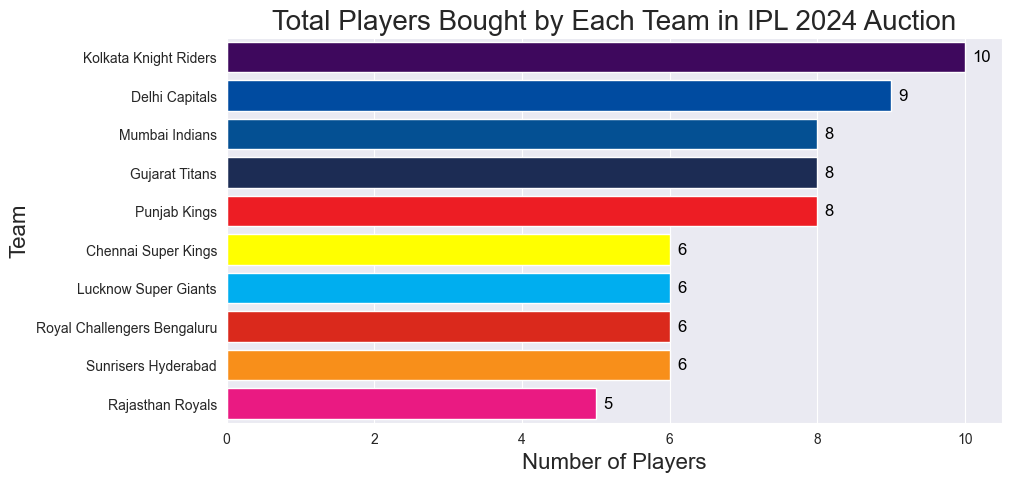

In [7]:
# Define the team colors dictionary
team_colors = {
    "Mumbai Indians": "#045093",
    "Chennai Super Kings": "#FFFF00",
    "Royal Challengers Bengaluru": "#DA291C",
    "Kolkata Knight Riders": "#3E085D",
    "Sunrisers Hyderabad": "#F88F1A",
    "Delhi Capitals": "#004BA0",
    "Punjab Kings": "#ED1D24",
    "Rajasthan Royals": "#EA1A82",
    "Lucknow Super Giants": "#00AEEF",
    "Gujarat Titans": "#1C2C54"
}

# Calculate player counts for each team
team_player_counts = df['TEAM'].value_counts().sort_values(ascending=False)

# Create a list of colors based on the team order in `team_player_counts`
bar_colors = [team_colors[team] for team in team_player_counts.index]

# Set the style for the plot
plt.figure(figsize=(10, 5))
sns.set_style("darkgrid")

# Create the horizontal bar plot
ax = sns.barplot(
    x=team_player_counts.values,
    y=team_player_counts.index,
    color='gray'  # Default color
)

# Manually apply the custom colors
for i, bar in enumerate(ax.patches):
    bar.set_facecolor(bar_colors[i])  # Set the color for each individual bar

# Add labels and title
plt.title('Total Players Bought by Each Team in IPL 2024 Auction', fontsize=20)
plt.xlabel('Number of Players', fontsize=16)
plt.ylabel('Team', fontsize=16)

# Display the player counts on the bars
for i, v in enumerate(team_player_counts.values):
    ax.text(v + 0.1, i, str(v), color='black', fontsize=12, va='center')

# Show the plot
plt.show()


##**Nationality Distribution of Players (Indian or Overseas)**

In [9]:
#Number of values for NATIONALITY (Indian or Overseas)
df['NATIONALITY'].value_counts()

NATIONALITY
Indian      42
Overseas    30
Name: count, dtype: int64

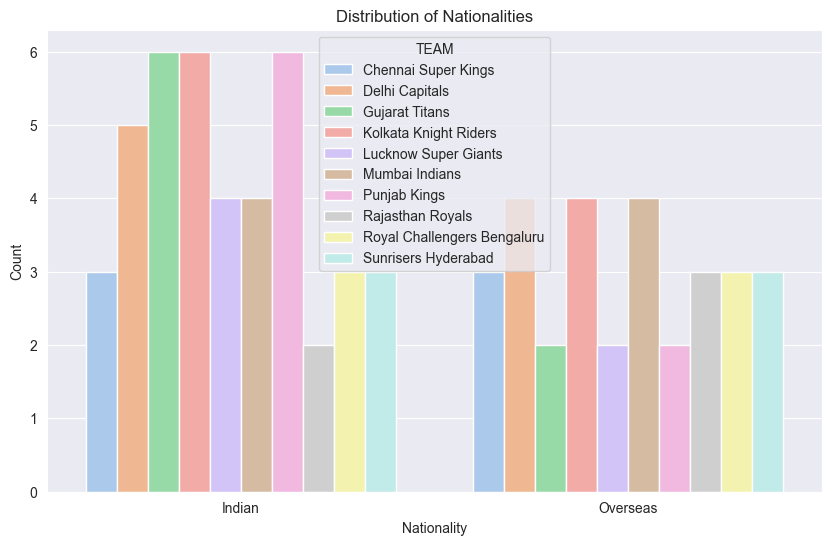

In [9]:
#Count plot number of values for NATIONALITY (Indian or Overseas)
plt.figure(figsize=(10, 6))
sns.countplot(x='NATIONALITY', data=df, order=df['NATIONALITY'].value_counts().index, hue='TEAM', palette='pastel')
plt.title('Distribution of Nationalities')
plt.xlabel('Nationality')
plt.ylabel('Count')
plt.show()

##**Count the players by Type: Bowler, All-Rounder, Batter, and Wicket-Keeper**

In [11]:
df['TYPE'].value_counts()

TYPE
Bowler           26
All-Rounder      25
Batter           13
Wicket-Keeper     8
Name: count, dtype: int64

DISTRIBUTION OF PLAYERS PLOT BY THEIR TYPE

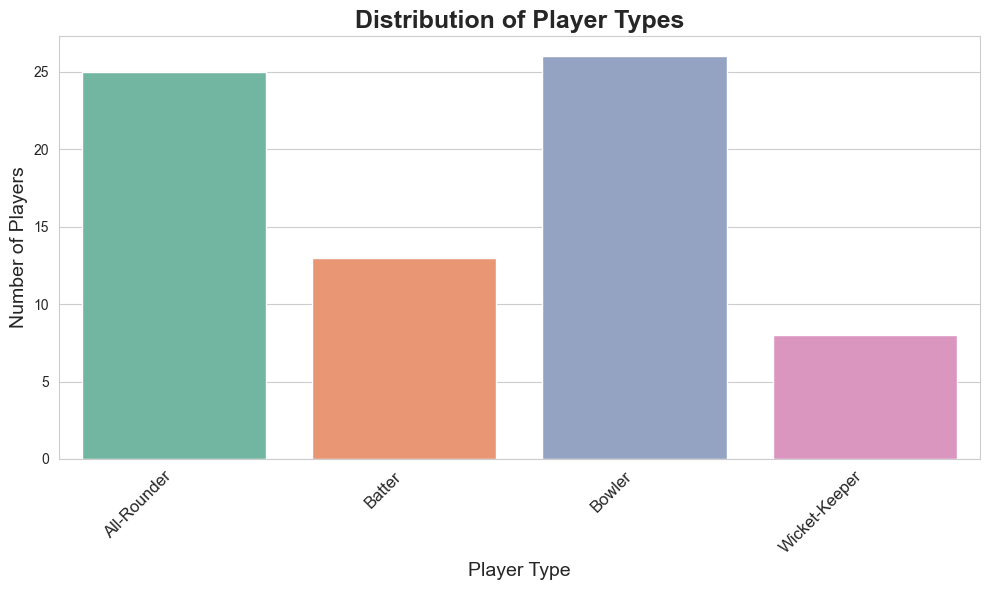

In [20]:

# Set the figure size for better clarity
plt.figure(figsize=(10, 6))

# Set the style for better aesthetics
sns.set_style("whitegrid")

# Create the count plot with custom color palette
sns.countplot(x='TYPE', data=df, hue='TYPE', palette='Set2', legend=False)

# Set the title and labels with larger font size for better readability
plt.title('Distribution of Player Types', fontsize=18, fontweight='bold')
plt.xlabel('Player Type', fontsize=14)
plt.ylabel('Number of Players', fontsize=14)

# Rotate the x-axis labels for better readability
plt.xticks(rotation=45, ha='right', fontsize=12)

# Add more spacing around the plot to prevent clipping of labels
plt.tight_layout()

# Show the plot
plt.show()


##**Display barplot to calculate total auction amount per Team**

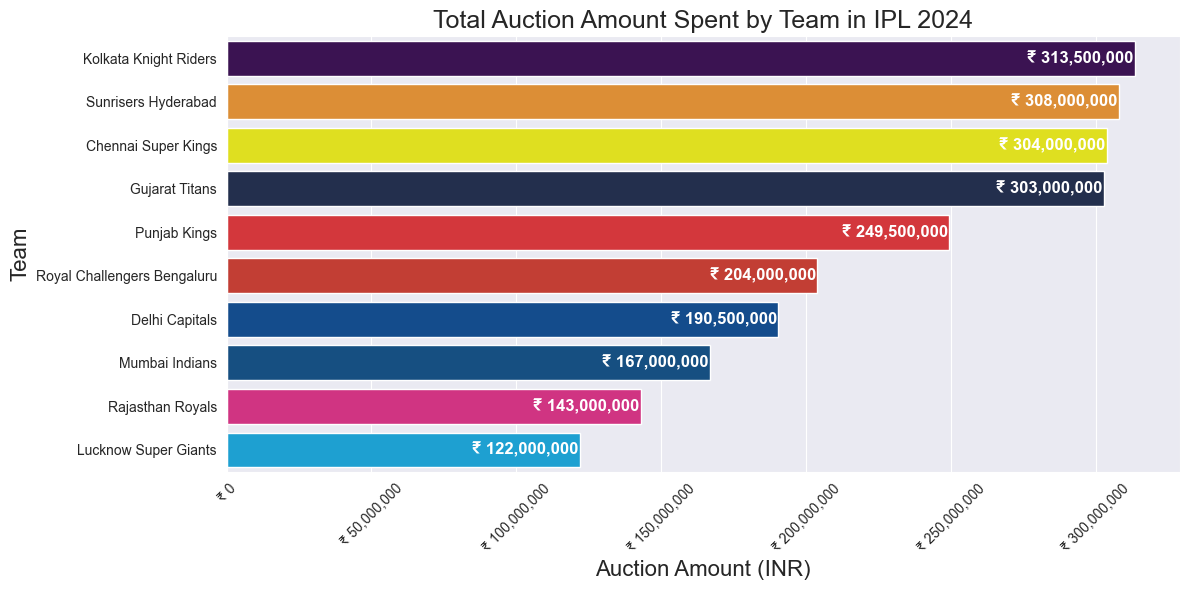

In [10]:

# Define the team colors dictionary
team_colors = {
    "Mumbai Indians": "#045093",
    "Chennai Super Kings": "#FFFF00",
    "Royal Challengers Bengaluru": "#DA291C",
    "Kolkata Knight Riders": "#3E085D",
    "Sunrisers Hyderabad": "#F88F1A",
    "Delhi Capitals": "#004BA0",
    "Punjab Kings": "#ED1D24",
    "Rajasthan Royals": "#EA1A82",
    "Lucknow Super Giants": "#00AEEF",
    "Gujarat Titans": "#1C2C54"
}

# Calculate total auction amount per team
team_total_amount = df.groupby('TEAM')['PRICE PAID'].sum().reset_index()

# Sort by total auction amount to display the highest spender first
team_total_amount = team_total_amount.sort_values('PRICE PAID', ascending=False)

# Set up the bar plot
plt.figure(figsize=(12, 6))

# Create a bar plot with custom colors using `hue` as 'TEAM' and disabling the legend
ax = sns.barplot(x='PRICE PAID', y='TEAM', data=team_total_amount, 
                 palette=team_colors, hue='TEAM', legend=False)

# Format x-axis ticks as INR amounts
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability

# Format x-axis tick labels as INR
ax.xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'₹ {x:,.0f}'))  # Format as INR

# Adding labels and title
plt.xlabel('Auction Amount (INR)', fontsize=16)
plt.ylabel('Team', fontsize=16)
plt.title('Total Auction Amount Spent by Team in IPL 2024', fontsize=18)

# Add annotations (amount values) inside the bars
for p in ax.patches:
    # Get the x and y coordinates of the bar
    x = p.get_width()  # This will be the auction amount
    y = p.get_y() + p.get_height() / 2  # Center the label vertically

    # Adjust the x-coordinate to shift the text more to the left inside the bar
    text_x = x - 500000  # Adjust this value to control the position of the text

    # Format the amount value as INR and add as text inside the bar
    ax.text(text_x, y, f'₹ {x:,.0f}', ha='right', va='center', fontsize=12, color='white', weight='bold')

# Display the plot
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()


##**Diaplay Player and Price Paid**

In [14]:
# Player and Price Paid Table
df[['PLAYER','PRICE PAID']]

,PLAYER,PRICE PAID
0,Daryl Mitchell,140000000
1,Sameer Rizvi,84000000
2,Shardul Thakur,40000000
3,Mustafizur Rahman,20000000
4,Rachin Ravindra,18000000
...,...,...
67,Travis Head,68000000
68,Jaydev Unadkat,16000000
69,Wanindu Hasaranga,15000000
70,Jhathavedh Subramanyan,2000000


##**Calculate Total Price for all Players in IPL2024**

In [5]:
# calculate sum values in column
sum_value = df[['PRICE PAID']].sum()
print(sum_value)

PRICE PAID    2304500000
dtype: int64


In [18]:
# Display the sum as a float
sum_float = float(sum_value.iloc[0])
print(sum_float)

2304500000.0


###**Calculate Total Price Paid for all Players in INR, USD, and Million USD**

In [19]:
# Conversion rate: 1 USD = 83.53 INR (as an example)
exchange_rate = 83.53

# Convert INR value to USD
value_in_usd = sum_float / exchange_rate

# Convert USD to million USD
value_in_million_usd = value_in_usd / 1e6  # Divide by 1 million

# Display the value in billion USD
print(f"Total Price PAID value in INR: ₹ {sum_float:.2f} ")
print(f"Total Price PAID value in USD: $ {value_in_usd:.2f} ")
print(f"Total Price PAID value in Million USD: $ {value_in_million_usd:.2f} ")

Total Price PAID value in INR: ₹ 2304500000.00 
Total Price PAID value in USD: $ 27588890.22 
Total Price PAID value in Million USD: $ 27.59 


##**Price paid for each player for each team**

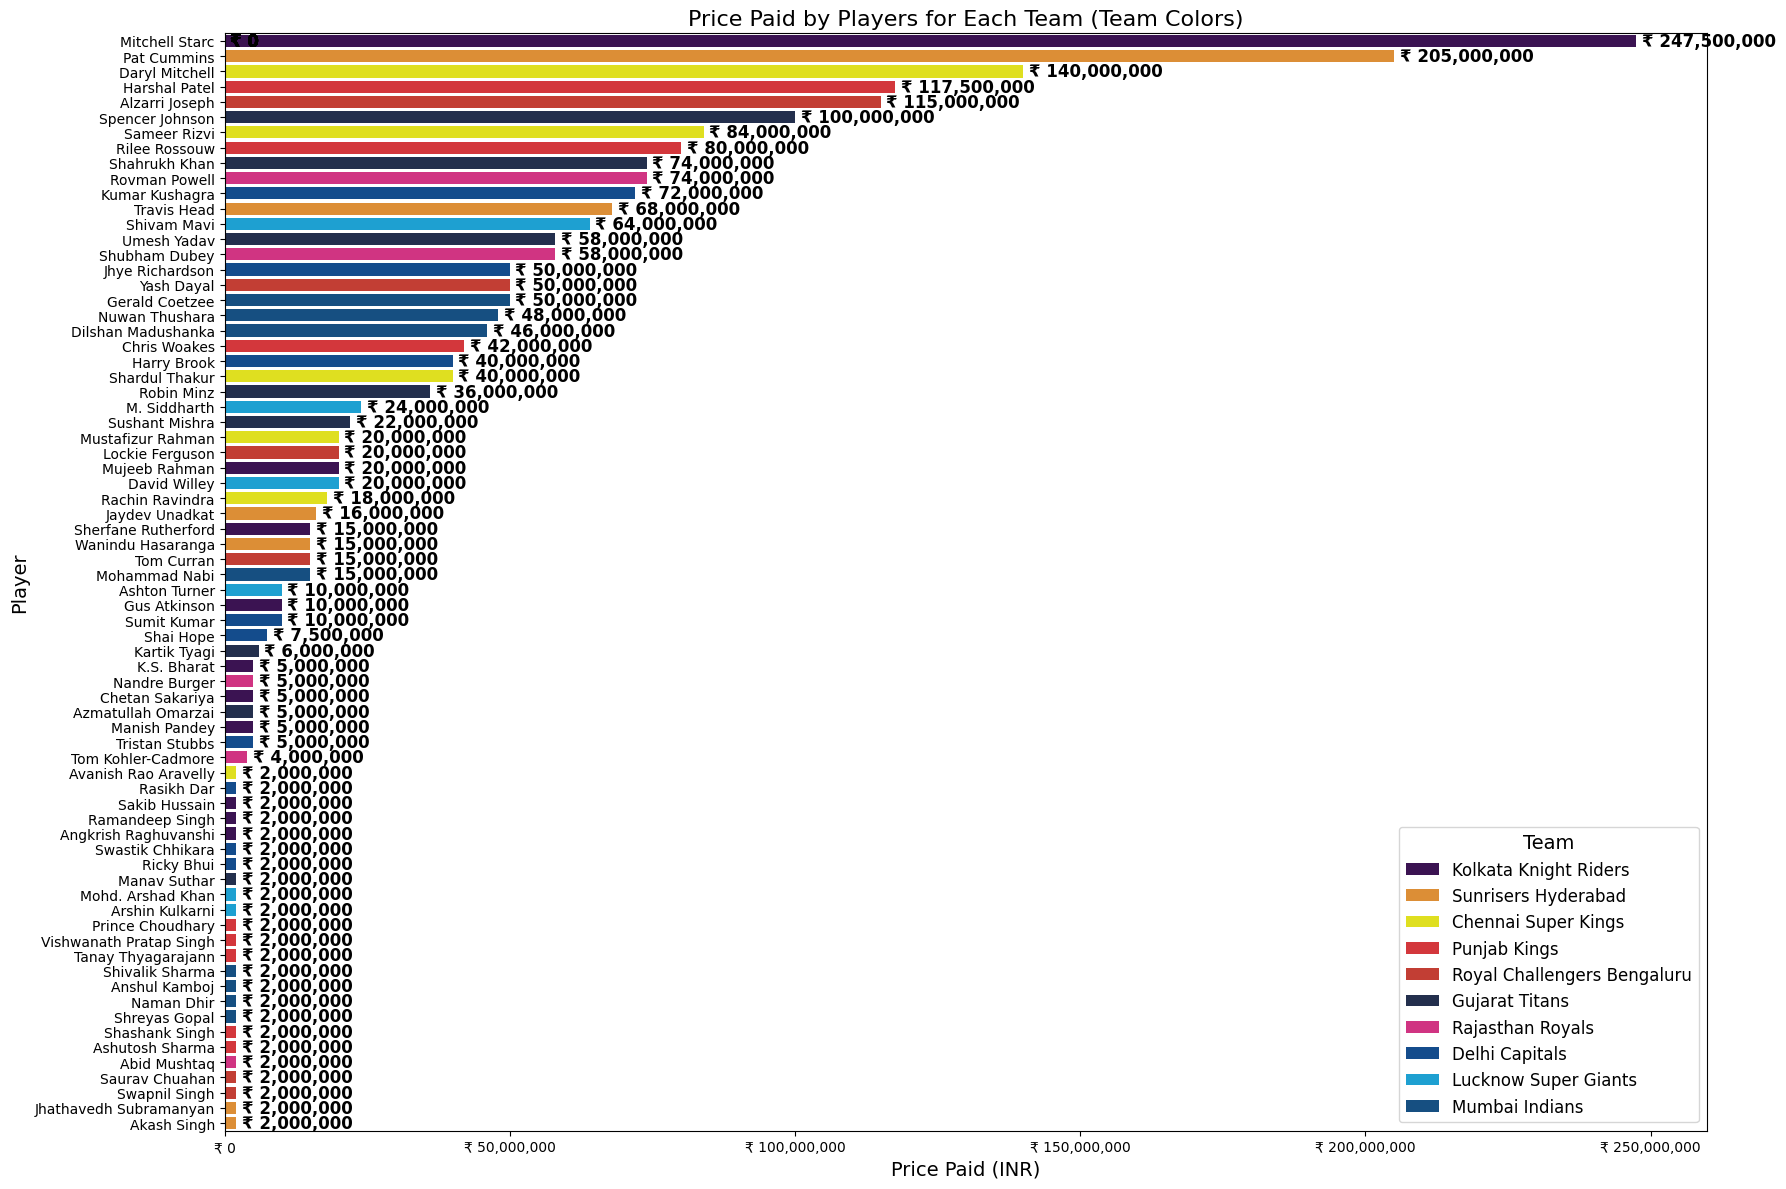

In [17]:
# Define team colors 
team_colors = {
    "Mumbai Indians": "#045093",
    "Chennai Super Kings": "#FFFF00",
    "Royal Challengers Bengaluru": "#DA291C",
    "Lucknow Super Giants": "#00AEEF",
    "Gujarat Titans": "#1C2C54",
    "Punjab Kings": "#ED1D24",
    "Sunrisers Hyderabad": "#F88F1A",
    "Delhi Capitals": "#004BA0",
    "Kolkata Knight Riders": "#3E085D",
    "Rajasthan Royals": "#EA1A82",
}

# Sort the dataframe by 'PRICE PAID' in descending order
df_sorted = df.sort_values(by='PRICE PAID', ascending=False)

# Set up the plot
plt.figure(figsize=(18, 12))
ax = sns.barplot(
    x='PRICE PAID',
    y='PLAYER',
    data=df_sorted,  # Use the sorted dataframe
    hue='TEAM',  # Use the TEAM column for color grouping
    palette=team_colors,  # Updated palette with all teams
    dodge=False
)

# Formatting x-axis ticks as INR amounts
ax.xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'₹ {x:,.0f}'))

# Adding labels and title
plt.xlabel('Price Paid (INR)', fontsize=14)
plt.ylabel('Player', fontsize=14)
plt.title('Price Paid by Players for Each Team (Team Colors)', fontsize=16)

# Add annotations (amount values) next to each bar
for p in ax.patches:
    x = p.get_width()  # Get the bar width (auction amount)
    y = p.get_y() + p.get_height() / 2  # Center the label vertically

    # Add text next to the bar
    plt.text(x + 1000000, y, f'₹ {x:,.0f}', ha='left', va='center', fontsize=12, color='black', weight='bold')

# Adjust legend and layout
plt.legend(title='Team', fontsize=12, title_fontsize=14, loc='lower right')
plt.tight_layout()

# Display the plot
plt.show()


##**Display price paid for player by Type: All-Rounder, Batter, and Wicket-Keeper**

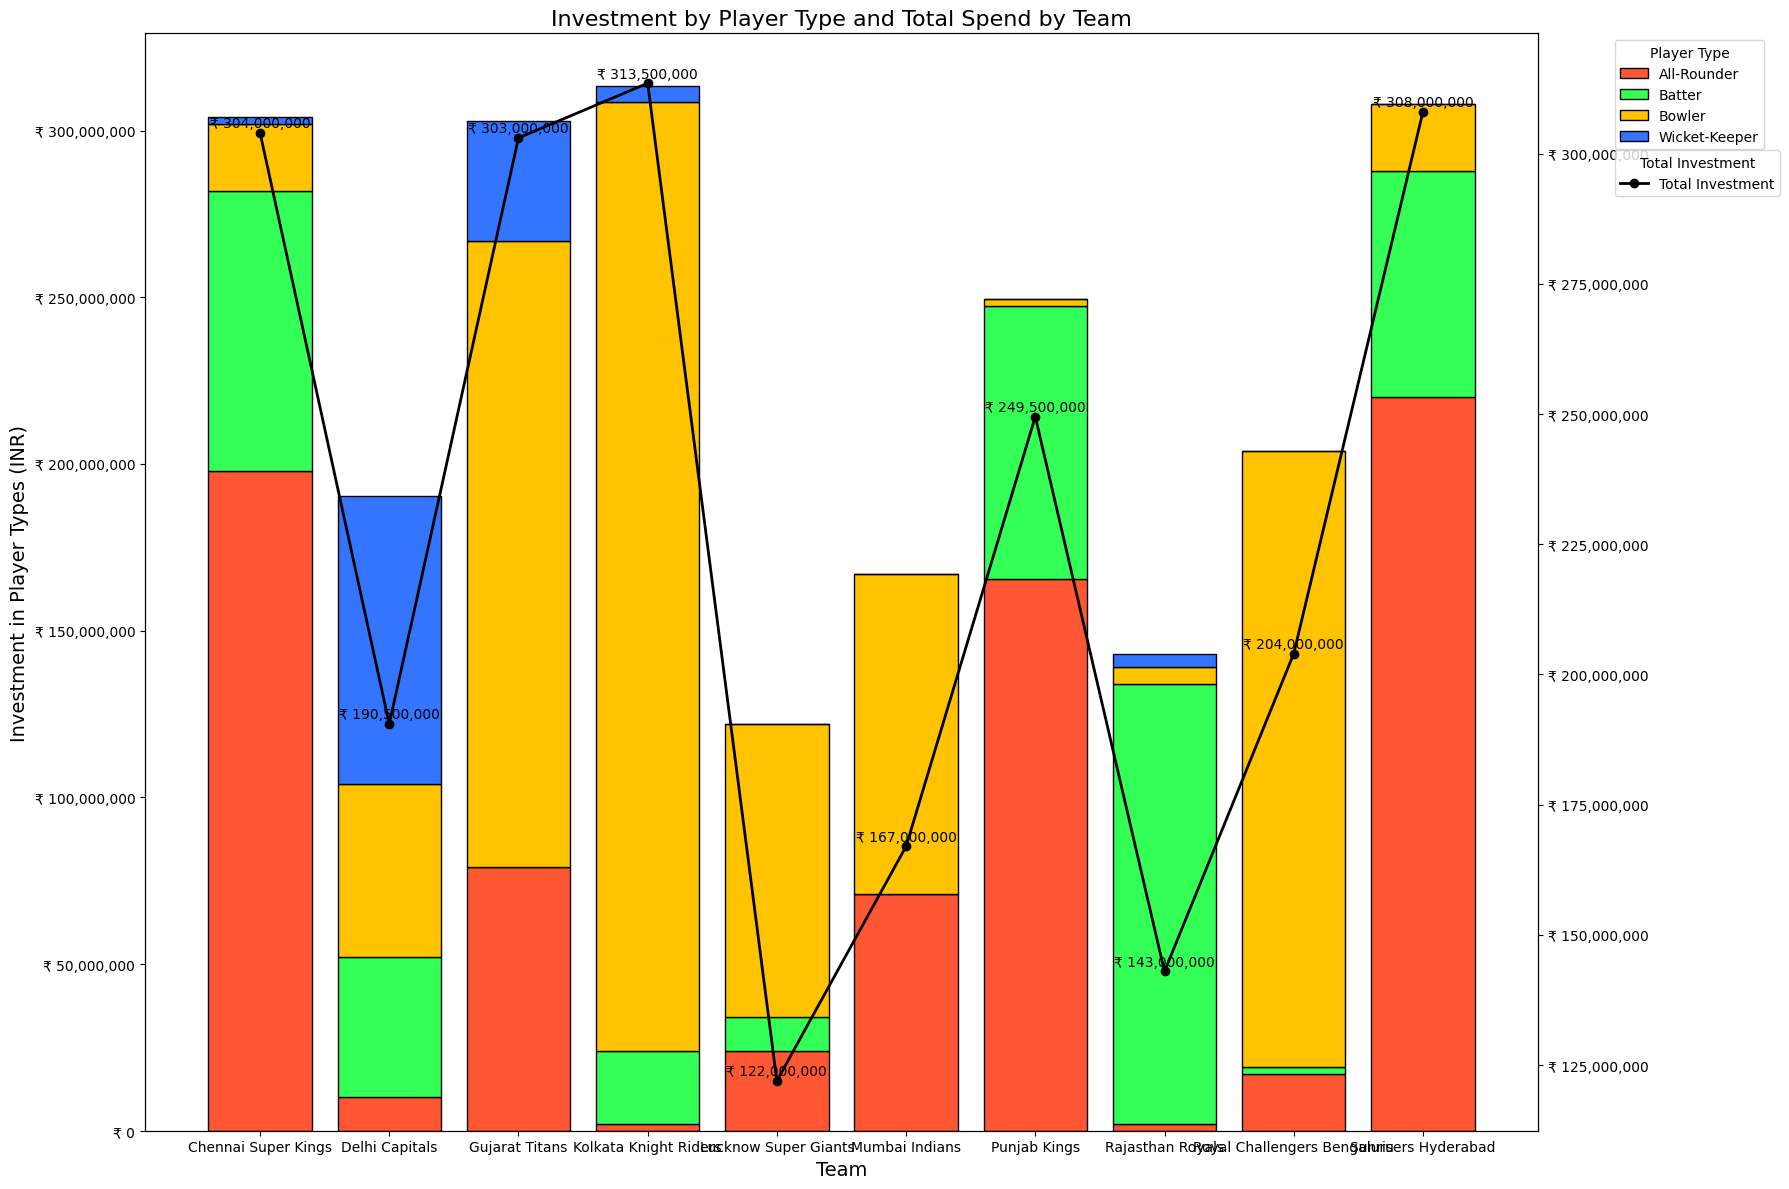

In [11]:

# Define the color palette for player types
player_type_colors = {
    "All-Rounder": "#FF5733",  # Red
    "Batter": "#33FF57",  # Green
    "Wicket-Keeper": "#3375FF",  # Blue
    "Bowler": "#FFC300",  # Yellow
}

# Group the data by TEAM and TYPE, then calculate total price paid
grouped_df = df.groupby(['TEAM', 'TYPE'])['PRICE PAID'].sum().reset_index()

# Pivot the DataFrame to prepare for a stacked bar chart
pivot_df = grouped_df.pivot(index='TEAM', columns='TYPE', values='PRICE PAID').fillna(0)

# Calculate the total investment per team
pivot_df['Total'] = pivot_df.sum(axis=1)

# Set up the figure and axis
fig, ax1 = plt.subplots(figsize=(18, 12))

# Initialize the bottom positions for stacking
bottoms = [0] * len(pivot_df)

# Plot the stacked bar chart using player type colors
for player_type in pivot_df.drop(columns=['Total']).columns:
    ax1.bar(
        pivot_df.index,
        pivot_df[player_type],
        bottom=bottoms,
        color=player_type_colors[player_type],
        edgecolor="black",
        label=player_type,
    )
    # Update bottoms for the next layer
    bottoms += pivot_df[player_type].values

# Set labels and title
ax1.set_xlabel('Team', fontsize=14)
ax1.set_ylabel('Investment in Player Types (INR)', fontsize=14)
ax1.set_title('Investment by Player Type and Total Spend by Team', fontsize=16)

# Add the second y-axis for the total investment line plot
ax2 = ax1.twinx()
ax2.plot(
    pivot_df.index,
    pivot_df['Total'],
    color='black',
    marker='o',
    linewidth=2,
    label='Total Investment',
   
)

# Format y-axis ticks as INR amounts
ax1.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'₹ {x:,.0f}'))
ax2.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'₹ {x:,.0f}'))

# Add a legend for player types and total investment
ax1.legend(title='Player Type', loc='upper left', bbox_to_anchor=(1.05, 1))
ax2.legend(title='Total Investment', loc='upper left', bbox_to_anchor=(1.05, 0.9))

# Rotate x-axis labels for readability
plt.xticks(rotation=45)

# Annotate the total investment values above the line plot points
for i, total in enumerate(pivot_df['Total']):
    ax2.text(i, total + 500000, f'₹ {total:,.0f}', ha='center', va='bottom', fontsize=10, color='black')

# Adjust layout to prevent clipping
plt.tight_layout()

# Show the plot
plt.show()


##**Display Players with price paid team wise from highest to lowest**

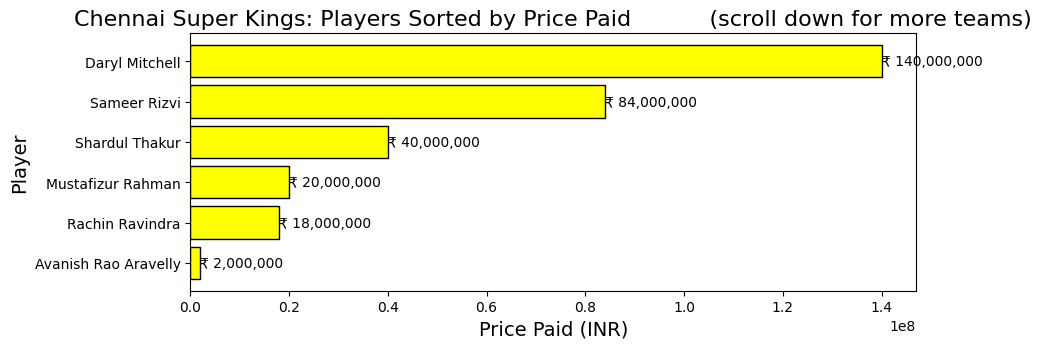

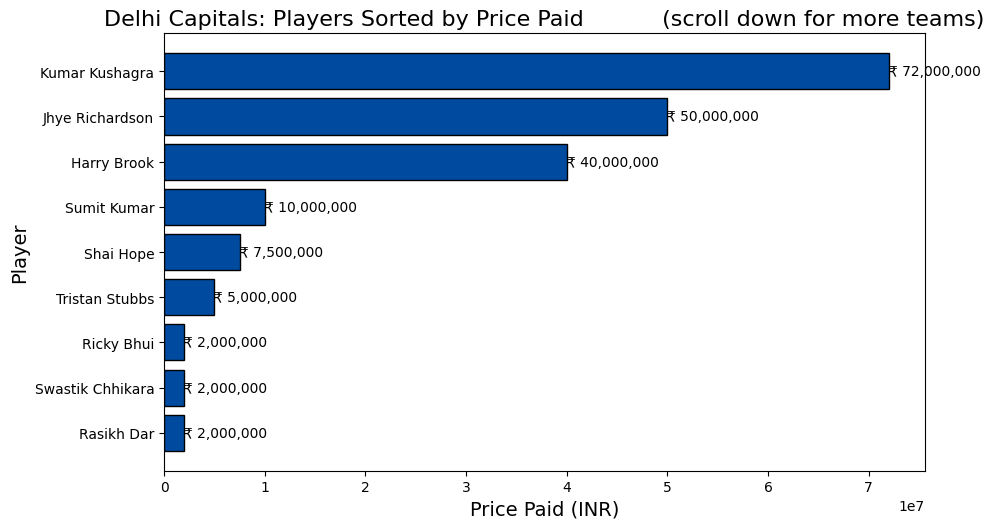

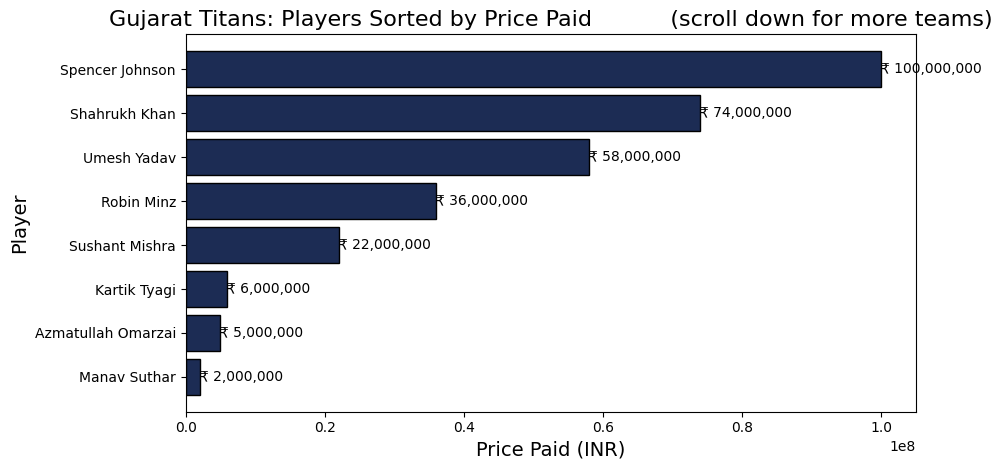

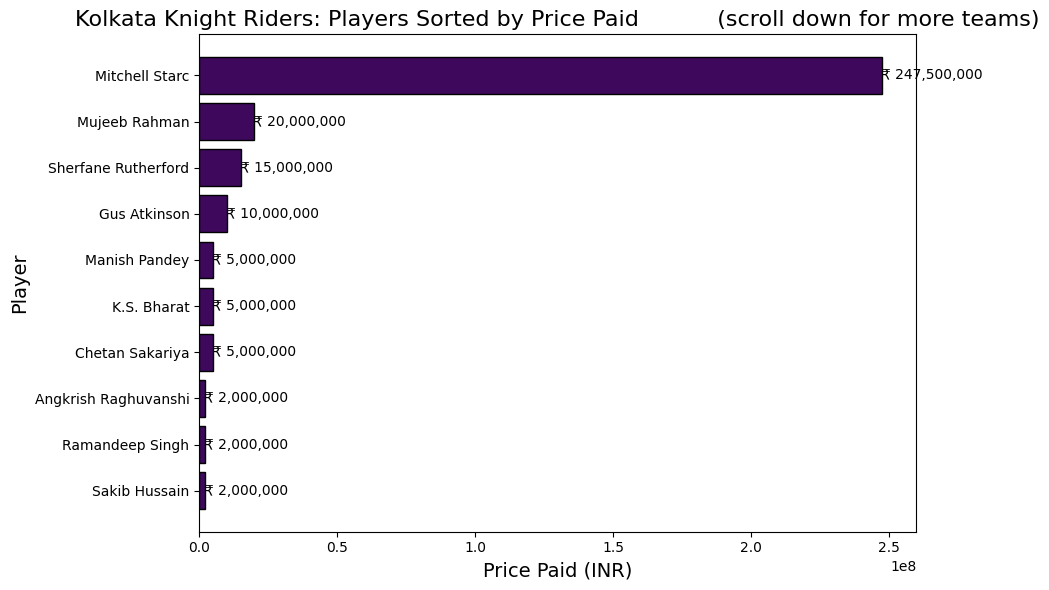

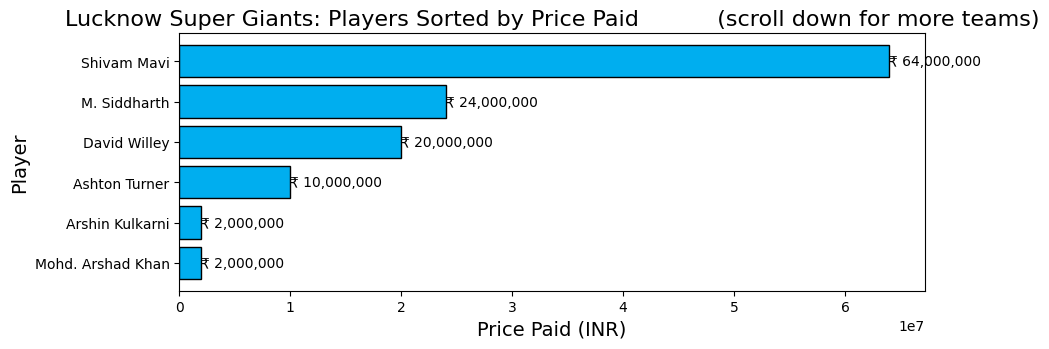

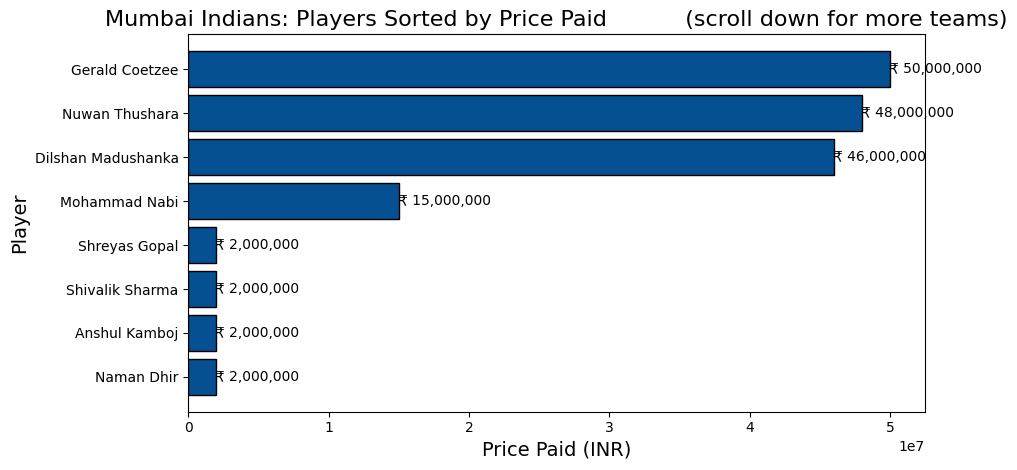

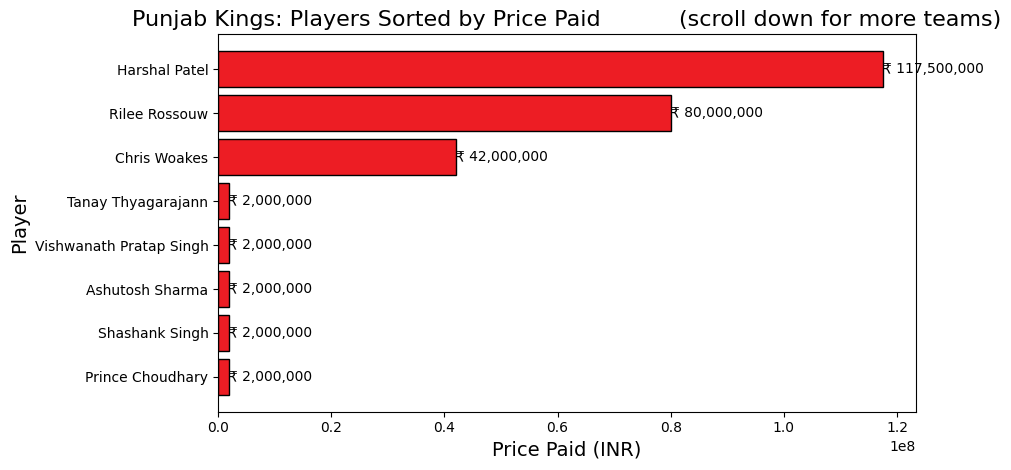

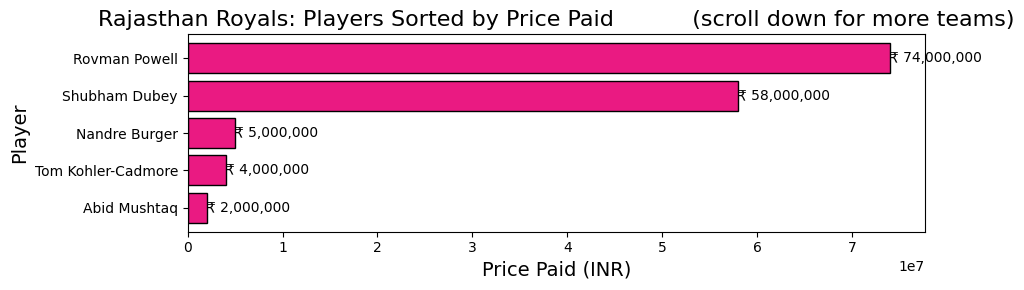

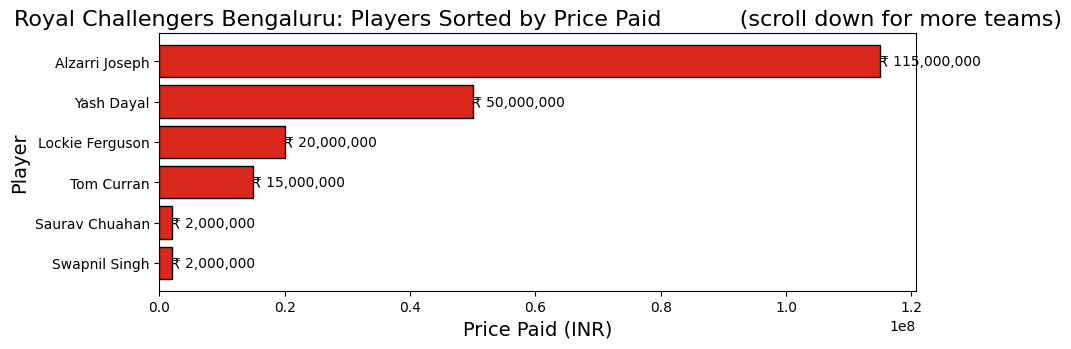

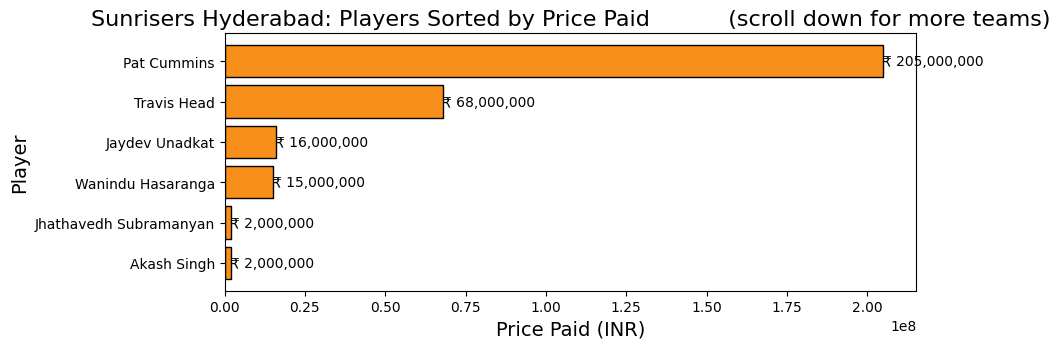

In [20]:
team_colors = {
    "Mumbai Indians": "#045093",
    "Chennai Super Kings": "#FFFF00",
    "Royal Challengers Bengaluru": "#DA291C",
    "Lucknow Super Giants": "#00AEEF",
    "Gujarat Titans": "#1C2C54",
    "Punjab Kings": "#ED1D24",
    "Sunrisers Hyderabad": "#F88F1A",
    "Delhi Capitals": "#004BA0",
    "Kolkata Knight Riders": "#3E085D",
    "Rajasthan Royals": "#EA1A82",
}
# Get unique teams
teams = df['TEAM'].unique()

# Create a separate plot for each team
for team in teams:
    # Filter data for the current team
    team_df = df[df['TEAM'] == team]

    # Sort players by price paid in descending order
    sorted_team_df = team_df.sort_values(by='PRICE PAID', ascending=False)

    # Plot the data
    plt.figure(figsize=(10, len(sorted_team_df) * 0.6))  # Adjust figure height dynamically
    plt.barh(
        sorted_team_df['PLAYER'], 
        sorted_team_df['PRICE PAID'], 
        color=team_colors.get(team, "#CCCCCC"),  # Use team color or a default gray
        edgecolor="black"
    )

    # Reverse the y-axis to show the highest value at the top
    plt.gca().invert_yaxis()

    # Add labels, title, and annotate the bars
    plt.xlabel('Price Paid (INR)', fontsize=14)
    plt.ylabel('Player', fontsize=14)
    plt.title(f'{team}: Players Sorted by Price Paid           (scroll down for more teams)', fontsize=16)

    for index, value in enumerate(sorted_team_df['PRICE PAID']):
        plt.text(value, index, f'₹ {value:,.0f}', va='center', ha='left', fontsize=10)

    # Adjust layout
    plt.tight_layout()

    # Show the plot
    plt.show()
